# Table of contents
1. Business motivation
2. Data gathering
3. Data exploration
4. Data cleaning: assessment
5. Data cleaning: method
6. Analysis and visualisation
7. Conclusion

## 1. Business motivation

Taking inspiration from Josh Bernhards medium post on Stack Overflows developer survey data from 2017 (https://medium.com/@josh_2774/how-do-you-become-a-developer-5ef1c1c68711), our aim in this notebook was to use the yearly survey data to explore the factors that affect programming language popularity trends. More precisely, we aimed to:

- track the general popularity of languages from 2017 to 2019
- Investigate whether languages highly desired among developers for a given year are indicative of popular "worked" languages in following years
- Investigate whether langauge popularity with student and professional subgroups of developers was driving the trends we saw in the general population.

It should be noted that the analysis that follows consists solely of descriptive statistics, and is intended to give an insight into exploring this dataset in a timeseries-oriented approach that could be used as a precursor to further ML analysis on these datasets.

## 2. Data gathering
All data was obtained from the stack overflow survey archives: https://insights.stackoverflow.com/survey
In particular, survey data and schemas were downloaded for the years 2017 to 2019 inclusive.
Some renaming of both the CSV survey and schema files was done prior to loading into the notebook below to distinguish one year from another. The survey result files may also need to be unzipped prior to loading.


In [1]:
# first, let's import some required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
%matplotlib inline

In [2]:
# now let's load in the surveys results and schemas for years 2017 to 2019
df_2019 = pd.read_csv('./2019_survey_results_public.csv')
df_2019_schema = pd.read_csv('./2019_survey_results_schema.csv')
df_2018 = pd.read_csv('./2018_survey_results_public.csv')
df_2018_schema = pd.read_csv('./2018_survey_results_schema.csv')
df_2017 = pd.read_csv('./2017_survey_results_public.csv')
df_2017_schema = pd.read_csv('./2017_survey_results_schema.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# let's do a quick verification of the load for each with 'head'
df_2019.head(n=3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult


In [4]:
df_2018.head(n=3)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_2017.head(n=3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN


## 3. Data exploration
With the data loaded, let's explore the general character of the data, namely shapes, null proportions and potential columns of interest for our analysis.

In [6]:
# shapes
for year, df in zip(('2017', '2018', '2019'), (df_2017, df_2018, df_2019)):
    print(year,": ",df.shape)

2017 :  (51392, 154)
2018 :  (98855, 129)
2019 :  (88883, 85)


Note that 2018 has almost double the records of 2017. Also note that no two years are uniform in terms of columns

Next, let's see if an column in any year has zero nulls and whether it may be of interest in our analysis

In [7]:
for year, df in zip(('2017', '2018', '2019'), (df_2017, df_2018, df_2019)):
    print(year,"has zero nulls in the following columns: \n",set(df.columns[~df.isna().any()]))

2017 has zero nulls in the following columns: 
 {'ProgramHobby', 'FormalEducation', 'University', 'EmploymentStatus', 'Professional', 'Country', 'Respondent'}
2018 has zero nulls in the following columns: 
 {'Hobby', 'OpenSource', 'Respondent'}
2019 has zero nulls in the following columns: 
 {'Hobbyist', 'OpenSourcer', 'Respondent'}


'EmploymentStatus' and 'Professional' may be of use from the 2017 data to identify student versus professional developers, from the above it has zero nulls. Respondent also has no nulls and is common to all three datasets. Let's take a look at its schema definitions to verify that it uniquely identifies each respondent to the survey:

In [8]:
df_2017_schema[df_2017_schema['Column'] == 'Respondent']

,Column,Question
0,Respondent,Respondent ID number


In [9]:
df_2018_schema[df_2018_schema['Column'] == 'Respondent']

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...


In [10]:
df_2019_schema[df_2019_schema['Column'] == 'Respondent']

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...


From the above it seems like it does.

Now let's check for other columns with high proportions of nulls which we may want to discount from our analysis:

In [11]:
# set(df_2019.columns[df_2019.isna().sum() > 0.75 * df_2019.shape[0]])
for year, df in zip(('2017', '2018', '2019'), (df_2017, df_2018, df_2019)):
    for p in (0.75, 0.50):
        print(year,"has over ",p," proportion of nulls in the following columns: \n",set(df.columns[df.isna().sum() > p * df.shape[0]]))
        print("\n")

2017 has over  0.75  proportion of nulls in the following columns: 
 {'ExCoderSkills', 'ExpectedSalary', 'ExCoderNotForMe', 'MobileDeveloperType', 'ExCoderReturn', 'ExCoderBelonged', 'ExCoderWillNotCode', 'ExCoder10Years', 'YearsCodedJobPast', 'TimeAfterBootcamp', 'WebDeveloperType', 'ExCoderActive', 'NonDeveloperType', 'ExCoderBalance'}


2017 has over  0.5  proportion of nulls in the following columns: 
 {'AssessJobLeaders', 'AssessJobDept', 'HaveWorkedFramework', 'InfluenceVizTools', 'AssessJobProfDevel', 'AssessJobExp', 'Currency', 'TimeAfterBootcamp', 'InfluenceServers', 'ExCoderActive', 'InfluenceRecruitment', 'MetricAssess', 'ResumePrompted', 'InfluenceTechStack', 'LearnedHiring', 'ExCoderReturn', 'InfluenceConsultants', 'Overpaid', 'WantWorkDatabase', 'ExCoder10Years', 'YearsCodedJobPast', 'AssessJobRemote', 'AssessJobCommute', 'JobProfile', 'EducationImportant', 'AssessJobRole', 'AssessJobFinances', 'AssessJobOffice', 'InfluenceHardware', 'MobileDeveloperType', 'InfluenceWorks

2019s data seems relatively clean: it has no columns which are more than 50% null. From scanning the 2017 and 2018 results it seems that columns with higher proportions of nulls are relatively obscure and we do not expect to include them in our analysis.

Now, let's get some descriptive statistics on our numerical columns for each year:

In [12]:
df_2017.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [13]:
df_2018.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [14]:
df_2019.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


The only numerical field above that may potentially be involved in our language popularity analysis would be 'Age' in the 2019 dataset. From the above you see can see that's somewhat right-skewed, we may want to drop the extreme large and small numbers, along with any nulls.

Finally in this data exploration segment we want to identify the fields of interest across each year.
From investigating the 2019 data and schema I settled on: 'Respondent', 'Student', 'LanguageWorkedWith' and 'LanguageDesireNextYear'. These fields were common to 2018s data. The corresponding fields I found in 2017 were:
'Respondent', 'Professional', 'HaveWorkedLanguage', and 'WantWorkLanguage'. 

Originally I had intended to use the 'YearsCodePro' fields in 2019 and it's analogues in 2018 and 2017 to identfy student versus non-student coders in my analysis. However, on realising that this was a single numerical value per respondent in 2019 but had range values in 2018 and 2017 (with different ranges in each), I decided that it would not be workable to create a consistent domain for it in a merged dataset. The same goes for 2019 'Age' column and its equivalents.

That aside, I believe the four columns above provide a concise representation of the data we need for our analysis: Respondent to uniquely identify each developer, Student/Professional to identify the develop subpopulation, and the language fields to measure instances of worked and desired languages per developer.

The next section will deal with investigating the characteristics of these specific fields across the datasets, and our methods to normalise them into consistent value domains for further analysis in a merged dataset of the yearly data.

## 4. Data cleaning: assessment

We'll now focus in on our chosen columns per year to assess what cleaning is required for combine them into a master dataframe for some timeseries analysis.
First, let's define mappings of yearly column names to "master" column names.

In [15]:
col_dict_2017 = {'Respondent' : 'Respondent',
                 'Professional' : 'Student',
                 'HaveWorkedLanguage' : 'LanguageWorkedWith',
                 'WantWorkLanguage' : 'LanguageDesireNextYear'
                }

col_dict_2018 = {'Respondent' : 'Respondent',
                 'Student' : 'Student',
                 'LanguageWorkedWith' : 'LanguageWorkedWith',
                 'LanguageDesireNextYear' : 'LanguageDesireNextYear'
                }

col_dict_2019 = {'Respondent' : 'Respondent',
                 'Student' : 'Student',
                 'LanguageWorkedWith' : 'LanguageWorkedWith',
                 'LanguageDesireNextYear' : 'LanguageDesireNextYear'
                }

Now let's get an idea of the null proportions of these fields per year:

In [16]:
#df_2019_clean.isna().mean()
for year, col_dict, df in zip(('2017', '2018', '2019'), (col_dict_2017, col_dict_2018, col_dict_2019), (df_2017, df_2018, df_2019)):
    print(year)
    print(df[list(col_dict.keys())].isna().mean())
    print("\n")

2017
Respondent            0.000000
Professional          0.000000
HaveWorkedLanguage    0.287340
WantWorkLanguage      0.342874
dtype: float64


2018
Respondent                0.000000
Student                   0.039998
LanguageWorkedWith        0.207587
LanguageDesireNextYear    0.259076
dtype: float64


2019
Respondent                0.000000
Student                   0.021028
LanguageWorkedWith        0.014783
LanguageDesireNextYear    0.053947
dtype: float64




For 2019, just over 2% of the 'Student' fields are null, I think this is a low enough percentage to consider dropping them.
'LanguageWorkedWith' is even lower, and concrete values for this field will certainly be important for our analysis. Therefore I'll also drop it's null values. 'LanguageDesireNextYear' has null values just over 5% of the time, which is not afigure to ignore. At the same time, I don't think that those who did not enter a value for these field represent a distinct subpopulation of interest in the survey, as it's quite similar to the field before it. Therefore I'm also happy to drop it's null values.
The null percentage range of 20-35% for the language fields in the 2017 and 2018 data is harder to justify, but again I do not think their absence indicates a distinct population of interest. Student/Professional are under acceptable null thresholds.
Based on all this, I've decided to drop records containing any nulls per year year for these column subsets.

Next, let's take a look at domains of each of the 4 columns of interest per year, to access how we can make them consistent before merging the datasets into a "master" dataset to use for our trend analysis.
First up, 'Respondent':

In [17]:
for year, col_dict, df in zip(('2017', '2018', '2019'), (col_dict_2017, col_dict_2018, col_dict_2019), (df_2017, df_2018, df_2019)):
    print(year)
    print(df[list(col_dict.keys())].dtypes)
    print("\n")

2017
Respondent             int64
Professional          object
HaveWorkedLanguage    object
WantWorkLanguage      object
dtype: object


2018
Respondent                 int64
Student                   object
LanguageWorkedWith        object
LanguageDesireNextYear    object
dtype: object


2019
Respondent                 int64
Student                   object
LanguageWorkedWith        object
LanguageDesireNextYear    object
dtype: object




Respondent is an int across all years. Duplicate values across years will not matter as we will be creating a derived "year" column in our final master dataframe. Therefore no cleaning is required here.
Now let's take a look different Student/professional columns across the years:

In [18]:
for year, studentCol, df in zip(('2017', '2018', '2019'), ('Professional', 'Student', 'Student'), (df_2017, df_2018, df_2019)):
    print(year,"\n")
    print(df[studentCol].value_counts())
    print("\n")

2017 

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64


2018 

No                70399
Yes, full-time    18394
Yes, part-time     6108
Name: Student, dtype: int64


2019 

No                65816
Yes, full-time    15769
Yes, part-time     5429
Name: Student, dtype: int64




2018 and 2019 have common domains for the Student fields. There is however a different domain in 2017.
Our approach here to create a consistent domain across the years will be to create a derived Boolean 'Student' column.
For simplicity, Professional or ex-professionals of any kind will have a student value of False, part-time students will be True. The full mapping and method for this can be found in the next section.

Finally for this section, let's look at the domain for the worked and desired language fields for 2017 to 2019:

In [19]:
for year, col_dict, df in zip(('2017', '2018', '2019'), (col_dict_2017, col_dict_2018, col_dict_2019), (df_2017, df_2018, df_2019)):
    print(year)
    print(df[list(col_dict.keys())].head(n=3))
    print("\n")

2017
   Respondent            Professional             HaveWorkedLanguage  \
0           1                 Student                          Swift   
1           2                 Student  JavaScript; Python; Ruby; SQL   
2           3  Professional developer              Java; PHP; Python   

          WantWorkLanguage  
0                    Swift  
1  Java; Python; Ruby; SQL  
2          C; Python; Rust  


2018
   Respondent Student            LanguageWorkedWith  \
0           1      No    JavaScript;Python;HTML;CSS   
1           3      No  JavaScript;Python;Bash/Shell   
2           4      No                           NaN   

       LanguageDesireNextYear  
0  JavaScript;Python;HTML;CSS  
1                   Go;Python  
2                         NaN  


2019
   Respondent         Student               LanguageWorkedWith  \
0           1              No  HTML/CSS;Java;JavaScript;Python   
1           2  Yes, full-time              C++;HTML/CSS;Python   
2           3              No

Note that each column element shares the characteristic of being a string of semi-colon-delimited language names.
Clearly, these can not be standardised across the datasets in their current format due to different ordering and counts per column element.
Our approach here will be to "explode" the datasets so that each record will represent a single instance of a listed worked/desired langauge, rather than just a single developer.
From there, we'll be able to resolve naming inconsistencies for common languages across the datasets, which will give us the language columns ready to use for analysis.
It's important to note here that we have not exhaustively checked every record to ensure both langauge fields follow this delimited format. We'll verify that this was the case after the explosion step.

Following the above assessment, we're now ready to create a data cleaning pipeline to standardise each yearly dataset and merge them into a "master" dataset for further analysis.

## 5. Data cleaning: method

We'll define two functions for our cleaning pipeline. First, a function to "explode" our yearly dataframes based on the semi-colon language columns. Kudos for this functions goes to jllns guthub profile: https://gist.github.com/jlln/338b4b0b55bd6984f883

In [20]:
def splitDataFrameList(df,target_column,separator):
    '''
    df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

Next, let's define a function to take a dataframe and perform the steps described in our cleaning assessment in the previous section, namely: reduce it to our columns of interest, remove all records containing nulls, harmonize our Student/Professional values into booleans, "explode" the dataframe by both langauge columns, and finally tag it with the year associated with the dataframe.

In [21]:
def standardizeDataFrame(df, col_dict, tag):
    ''' df =  dataframe to normalize,
    col_dict = dictionary mapping raw column names to desired column names
    tag = will be entry in constructed column to identify the input df in the final merged dataset
    returns: dataframe stripped of nulls, with 2 constructed columns to identify by tag and worked/desired languages,
    each row of which represents an instance of a desired or worked language. Student categorees are also reduced to a 
    boolean column
    '''
    # get desired subset of raw columns
    df = df[list(col_dict.keys())]
    # rename
    df = df.rename(columns = col_dict)
    # drop nulls
    df = df.dropna()
    # assign superset of student categories found across the dataframe to True/False
    student_map = {'Professional developer' : False,
                   'Professional non-developer who sometimes writes code' : False,
                   'Used to be a professional developer' : False,
                   'Student' : True,
                   'Yes, full-time' : True, 
                   'Yes, part-time' : True,
                   'No' : False,
                   'None of these' : False
                  }
    df['Student'] = df['Student'].replace(student_map)
    # split dataset by worked and desired langauges before we explode those columns
    # tag with a new column identifying whether the df represents worked or desired languages before merging back
    df_langs_worked = df.drop(['LanguageDesireNextYear'], axis=1)
    df_langs_worked = splitDataFrameList(df_langs_worked, 'LanguageWorkedWith', ';')
    df_langs_worked['LangType'] = 'worked'
    df_langs_worked = df_langs_worked.rename(columns = {'LanguageWorkedWith' : 'Language'})
    df_langs_desired = df.drop(['LanguageWorkedWith'], axis=1)
    df_langs_desired = splitDataFrameList(df_langs_desired, 'LanguageDesireNextYear', ';')
    df_langs_desired['LangType'] = 'desired'
    df_langs_desired = df_langs_desired.rename(columns = {'LanguageDesireNextYear' : 'Language'})
    # append the two explode dataframes
    df = df_langs_worked.append(df_langs_desired, ignore_index=True)
    # trim language field
    df['Language'] = df['Language'].str.strip()
    # finally tag with year
    df['SubDataFrame'] = tag
    return df

Now let's define the arguments for the above functions

In [22]:
df_master = []
df_years = (df_2017, df_2018, df_2019)
col_dicts = (col_dict_2017, col_dict_2018, col_dict_2019)
tags = ('2017', '2018', '2019')
args = zip(df_years, col_dicts, tags)

We're now ready to run the pipeline itself, which simply consists of looping the yearly tags, column dictionaries and dataframes through the standardizeDataFrame and concatenating the results to create our master dataframe:

In [23]:
for df, col_dict, tag in args:
    df_std = standardizeDataFrame(df, col_dict, tag)
    df_master.append(df_std)
df_master = pd.concat(df_master, ignore_index=True)

It's important to note that each record of the resultant dataframe no longer represents a single survey respondent, it now contains a record per respondent, per each desired and worked langauge they stated.

Now, let's do some verifications to ensure that the cleaning pipeline worked as we expected.
First, let's verify the head:

In [24]:
df_master.head()

,Language,Respondent,Student,LangType,SubDataFrame
0,Swift,1,True,worked,2017
1,JavaScript,2,True,worked,2017
2,Python,2,True,worked,2017
3,Ruby,2,True,worked,2017
4,SQL,2,True,worked,2017


Let's verify the Student mapping to boolean:

In [25]:
df_master.Respondent.groupby([df_master['SubDataFrame'], df_master['Student']]).size()

SubDataFrame  Student
2017          False      216862
              True        35626
2018          False      611678
              True       209802
2019          False      591802
              True       208702
Name: Respondent, dtype: int64

Now, let's check if we have consistent domains across the 3 years for our two language fields.
First, "Worked" languages:

In [26]:
pd.set_option('display.max_rows', 160)
df_master[df_master.LangType == 'worked'].Respondent.groupby([df_master['Language'], df_master['SubDataFrame']]).size()

Language               SubDataFrame
Assembly               2017             1591
                       2018             5146
                       2019             5306
Bash/Shell             2018            28982
Bash/Shell/PowerShell  2019            30293
C                      2017             6271
                       2018            16320
                       2019            16628
C#                     2017            11228
                       2018            24403
                       2019            25406
C++                    2017             7376
                       2018            18005
                       2019            18995
CSS                    2018            46725
Clojure                2017              362
                       2018              961
                       2019             1188
Cobol                  2018              483
CoffeeScript           2017             1104
                       2018             2387
Common Lisp        

Let's do the same for "desired":

In [27]:
df_master[df_master.LangType == 'desired'].Respondent.groupby([df_master['Language'], df_master['SubDataFrame']]).size()

Language               SubDataFrame
Assembly               2017             1901
                       2018             3989
                       2019             4352
Bash/Shell             2018            20382
Bash/Shell/PowerShell  2019            20888
C                      2017             4777
                       2018             9986
                       2019            10734
C#                     2017            10113
                       2018            20013
                       2019            21929
C++                    2017             7563
                       2018            14845
                       2019            16315
CSS                    2018            29529
Clojure                2017             1302
                       2018             2654
                       2019             2672
Cobol                  2018              425
CoffeeScript           2017             1023
                       2018             1781
Common Lisp        

Observe that we have the 'Bash/Shell/PowerShell' group in 2019, and 'Bash/Shell' in 2018 (also note that these were consider environments rather than languages in 2017 and so are absent for that year, however that  cleaning is beyond the scope of this notebook). Also see that we have the 'HTML/CSS' group in 2019, but that these are two distinct categories in 2018 (absent from 2017 as they are deemed 'web frameworks' in that dataset).

Let's harmonize the CSS, HTML and Bash/Shell categories from 2018 with their corresponding 2019 values with a remap:

In [28]:
df_master['Language'] = df_master['Language'].replace({'Bash/Shell' : 'Bash/Shell/PowerShell', 'CSS' : 'HTML/CSS', 'HTML' : 'HTML/CSS'})

Let's verify that we now have common langauge names across the years for the desired and worked categories:

In [29]:
df_master[df_master.LangType == 'worked'].Respondent.groupby([df_master['Language'], df_master['SubDataFrame']]).size()

Language               SubDataFrame
Assembly               2017             1591
                       2018             5146
                       2019             5306
Bash/Shell/PowerShell  2018            28982
                       2019            30293
C                      2017             6271
                       2018            16320
                       2019            16628
C#                     2017            11228
                       2018            24403
                       2019            25406
C++                    2017             7376
                       2018            18005
                       2019            18995
Clojure                2017              362
                       2018              961
                       2019             1188
Cobol                  2018              483
CoffeeScript           2017             1104
                       2018             2387
Common Lisp            2017              248
Dart               

In [30]:
df_master[df_master.LangType == 'desired'].Respondent.groupby([df_master['Language'], df_master['SubDataFrame']]).size()

Language               SubDataFrame
Assembly               2017             1901
                       2018             3989
                       2019             4352
Bash/Shell/PowerShell  2018            20382
                       2019            20888
C                      2017             4777
                       2018             9986
                       2019            10734
C#                     2017            10113
                       2018            20013
                       2019            21929
C++                    2017             7563
                       2018            14845
                       2019            16315
Clojure                2017             1302
                       2018             2654
                       2019             2672
Cobol                  2018              425
CoffeeScript           2017             1023
                       2018             1781
Common Lisp            2017              640
Dart               

Looks good! Observe the increase in the Bash/Shell/Powershell and HTML/CSS groups.

With our master dataframe containing the standardized and cleaned yearly datasets, we are now in a position to create some statistics and visualisations to help answer our 3 business questions.

## 6. Analysis and visualisation

First, we want visualise the general 'worked' language popularity trends year on year. Let' start by writing a function that, given our master dataframe and a 'worked'/'desired' category string, will create two dataframes: one containing the percentage "market-share" of every language in the specified category per year, and a second which just contains the top ten languages by market-share for that category per year:

In [31]:
def getLanguageMarketShareByYear(df, category):
    # filter records by language category
    df = df[df.LangType == category]
    # replace year columns with ints - handy for setting axes in plots
    df['SubDataFrame'] = df['SubDataFrame'].replace({'2017' : 0, '2018' : 1, '2019': 2})
    # get record counts by year, language
    df = df.groupby(['SubDataFrame', 'Language']).agg({'Respondent': 'size'})
    # get the percentage share of each langauge by year
    df_pc = df.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    # group the percentages by year and get the top ten for each year
    df_pc_top10 = df_pc['Respondent'].groupby(level=0, group_keys=False)
    df_pc_top10 = pd.DataFrame(df_pc_top10.apply(lambda x: x.sort_values(ascending=False).head(10)))
    # reset the index on each dataframe: "fills forward" the values of the columns we grouped by
    df_pc = df_pc.reset_index()
    df_pc_top10 = df_pc_top10.reset_index()
    return df_pc, df_pc_top10

In [32]:
df_master_worked_pcs, df_master_worked_pcs_top10 = getLanguageMarketShareByYear(df_master, 'worked')
df_master_desired_pcs, df_master_desired_pcs_top10 = getLanguageMarketShareByYear(df_master, 'desired')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Let's observed the top ten worked languages by year, remember that 0, 1 and represent 2017, 2018 and 2019 respectively:

In [33]:
df_master_worked_pcs_top10

,SubDataFrame,Language,Respondent
0,0,JavaScript,16.628152
1,0,SQL,13.575541
2,0,Java,10.489577
3,0,C#,8.916419
4,0,Python,8.541592
5,0,PHP,7.380584
6,0,C++,5.857455
7,0,C,4.979948
8,0,TypeScript,2.543578
9,0,Ruby,2.447489


Now, let's plot a trendline for the the most popular langauges across the years to answer our first business question:

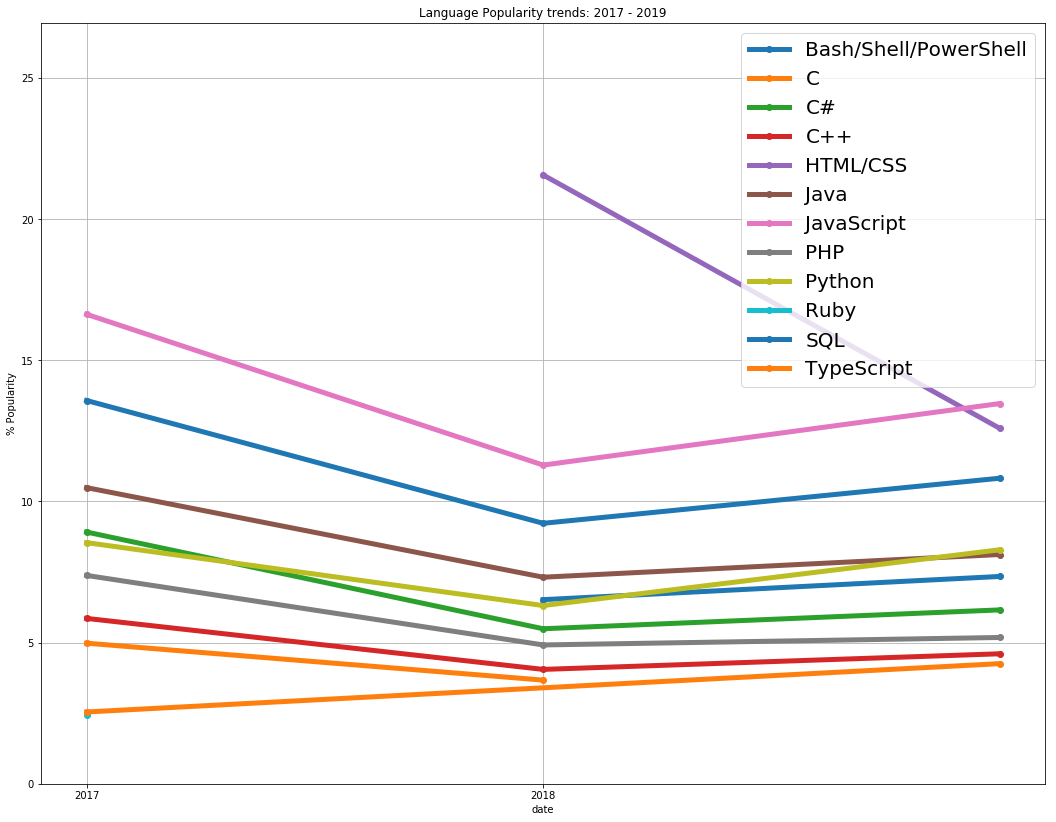

In [34]:
fig, ax = plt.subplots(figsize=(18, 14))
for key, grp in df_master_worked_pcs_top10.groupby(['Language']):
    ax = grp.plot(ax=ax, kind='line', linewidth=5.0, x='SubDataFrame', y='Respondent', label=key, marker='o')
    ax.autoscale_view()
    ax.legend(loc='upper right', prop={'size' : 20})
    plt.xticks(np.arange(2), ('2017', '2018', '2019'))
    plt.grid()
    plt.xlabel('date')
    plt.ylim(0, df_master_worked_pcs_top10['Respondent'].max() * 1.25)
    plt.ylabel('% Popularity')
    plt.title('Language Popularity trends: 2017 - 2019')
plt.show()

We can see some obvious patterns from this. Firstly, the top ten languages year on year are subject to change, as revealed by the absence of one of the three datapoints for a given langauge. I should stress that the missing 2017 datapoint for HTML/CSS does not depict a jump into the top ten for it in 2018, rather it was not classified as a language in 2017. The same scenario can be observed for Bash/Shell/Powershell. This highlights one of the complications in comparing datasets year on year - answer categories are subject to change. 
In contrast, The absence of 'C' in 2019 does in fact represent it's falling out of the top ten most popular languages as it is a category in all three years.

Another trend we see is an increase in "market fragmentation" from 2017 to 2019 in worked langauges. Although generally each language maintains its position in the top ten, we see that their overall percentage share is decreasing. 
For example Javascript, the top langauge in 2017 and 2019, has seen a decrease in marketshare from 16.628152 to 13.467636.
It be noted that this fragmentation may indicate a general increase in available categories in the surveys year on year, rather than an actual descrease in popularity of Javascript and the other langauges.

Finally, another observation to make is an exception to the general trend of each langauge "holding its own" in the overall position: python bunny hops both Bash/Shell/Powershell and java from 2018 to 2019 to take the 4th spot.

Next, let's investigate whether highly desired languages among developers for a given year are indicative of the most popular languages for that next year.

First, let's focus our data on the top ten most popular "worked" langauges of 2018:

In [35]:
df_master_worked_pcs_top10_2018 = df_master_worked_pcs_top10[df_master_worked_pcs_top10['SubDataFrame'] == 1]

Next, we'll get the marketshare of all "desired" langauges for 2018, as well as the marketshare of all "worked" langauges for 2019:

In [36]:
df_master_desired_pcs_2018 = df_master_desired_pcs[df_master_desired_pcs['SubDataFrame'] == 1]
df_master_worked_pcs_2019 = df_master_worked_pcs[df_master_worked_pcs['SubDataFrame'] == 2]

What we want to do here is join the 2018 "desired" and 2019 "worked" datasets above to the top ten worked langauges of 2018. 
Let's rename the langauge columns per dataframe and reset the index columns to facilitate this join

In [37]:
df_worked_pcs_top10_2018 = df_master_worked_pcs_top10_2018[['Language', 'Respondent']].rename(columns={'Respondent' : 'worked_2018'}).set_index('Language')
df_desired_pcs_2018 = df_master_desired_pcs_2018[['Language', 'Respondent']].rename(columns={'Respondent' : 'desired_2018'}).set_index('Language')
df_worked_pcs_2019 = df_master_worked_pcs_2019[['Language', 'Respondent']].rename(columns={'Respondent' : 'worked_2019'}).set_index('Language')

We can now join our three datasets to get some stats per language of worked marketshares in 2018 and 2019, and desired marketshare in 2018:

In [38]:
df_worked_vs_desired_2018_2019 = df_worked_pcs_top10_2018.join((df_desired_pcs_2018, df_worked_pcs_2019)).sort_values(by='worked_2018', ascending=False)
df_worked_vs_desired_2018_2019 = df_worked_vs_desired_2018_2019.reset_index()
df_worked_vs_desired_2018_2019

,Language,worked_2018,desired_2018,worked_2019
0,HTML/CSS,21.563430,16.072745,12.590788
1,JavaScript,11.288036,9.989181,13.467636
2,SQL,9.226296,7.269728,10.823273
3,Java,7.317353,5.811752,8.120970
4,Bash/Shell/PowerShell,6.521866,5.404961,7.343758
5,Python,6.313037,8.505481,8.288000
6,C#,5.491447,5.307108,6.159030
7,PHP,4.918066,3.129690,5.182303
8,C++,4.051694,3.936642,4.604848
9,C,3.672516,2.648118,4.031030


Let's graph these results. Kudos to this stack overflow post for the method to plot mutliple barcharts on the same x axis:
https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars

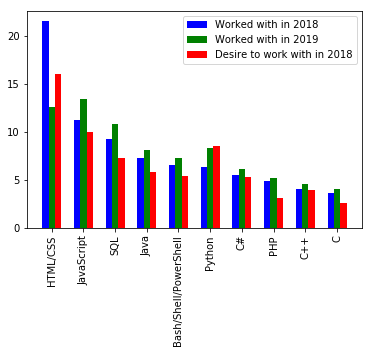

In [39]:
# define x ticks for our barchart
x = 2+np.arange(len(df_worked_vs_desired_2018_2019))
# extract values for our bars; these will reside on the same x axis
worked_2018 = df_worked_vs_desired_2018_2019['worked_2018']
worked_2019 = df_worked_vs_desired_2018_2019['worked_2019']
desired_2018 = df_worked_vs_desired_2018_2019['desired_2018']

ax = plt.subplot(111)
# place our three metrics alongside eachother on the x axis
worked_2018_ax = ax.bar(x-0.2, worked_2018, width=0.2, color='b', align='center')
worked_2019_ax = ax.bar(x, worked_2019, width=0.2, color='g', align='center')
desired_2018_ax = ax.bar(x+0.2, desired_2018, width=0.2, color='r', align='center')

# set and label x ticks
ax.set_xticks(x)
ax.set_xticklabels(df_worked_vs_desired_2018_2019['Language'])

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
ax.legend((worked_2018_ax[0], worked_2019_ax[0], desired_2018_ax[0]), ('Worked with in 2018', 'Worked with in 2019', 'Desire to work with in 2018'))

plt.show()


Does this graph reveal anything interesting about the relationship between worked language marketshare in 2018, worked language marketshare in 2019, and desired language market share in 2018?
Well, the first thing it point out is that the top two leaders in each metric are the identical: HTML/CSS and Javascript are the two top langauges in 2018, maintain thse positions in 2019 and are deemed most desired in 2018. 
However, what's really interesting is that the "desired" language leaderboard for 2018 gets shaken up once we move past the top two: more people reported wanting to work with Python in 2018 compared to SQL, Java and Bash/Shell/PowerShell even though they were more popular in terms of "worked" languages in 2018. However, as revealed in this and the previous graph, Pythons "worked" popularity in 2019 also exceeded that of Java and Bash/Shell/PowerShell. Of course we cannot come to any concrete conclusions about the high desirabilty of Python in 2018 and it's jump in the leaderboard in 2019, but it does suggest that desired languages may be a decent estimate of their future popularity, and could be worth investiagting in an ML scenario.

Finally in this section, let's subdivide each "worked" language marketshare percentage for 2018 and 2019 by the proportion of students and non-students using the language. This may provide some insight into whether these subgroups are driving the more general popularity trends we see above.

In [40]:
# first, get 'worked' lanuage percentages by year, Student/Non-Student
df_master_worked_pcs_by_year_student = df_master[df_master['LangType'] == 'worked'].groupby(['SubDataFrame', 'Student', 'Language']).agg({'Respondent': 'size'})
df_master_worked_pcs_by_year_student = df_master_worked_pcs_by_year_student.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_master_worked_pcs_by_year_student = df_master_worked_pcs_by_year_student.reset_index()

# drop the 2017 data
df_master_worked_pcs_by_year_student = df_master_worked_pcs_by_year_student[df_master_worked_pcs_by_year_student['SubDataFrame'] != '2017']

# define an ordered list of the top ten 'worked' langauges from 2018
lang_order = df_worked_vs_desired_2018_2019['Language']

# filter to only include these languages
df_master_worked_pcs_by_year_student = df_master_worked_pcs_by_year_student[df_master_worked_pcs_by_year_student['Language'].isin(lang_order)]

# define colors for our stacked barchart plot
colors = ["#006D2C", "#31A354"]

In [41]:
# oberve underlying student/non-student breakdown per language, per year
df_master_worked_pcs_by_year_student

,SubDataFrame,Student,Language,Respondent
71,2018,False,Bash/Shell/PowerShell,5.129821
72,2018,False,C,2.244240
73,2018,False,C#,4.250622
74,2018,False,C++,2.591464
83,2018,False,HTML/CSS,16.419657
86,2018,False,Java,5.148048
87,2018,False,JavaScript,8.800987
94,2018,False,PHP,3.555500
96,2018,False,Python,4.549239
100,2018,False,SQL,7.120900


Now let's graph these breakdowns. Kudos to this blog post for the following method of creating stacked barcharts fron pivot tables:
https://pstblog.com/2016/10/04/stacked-charts

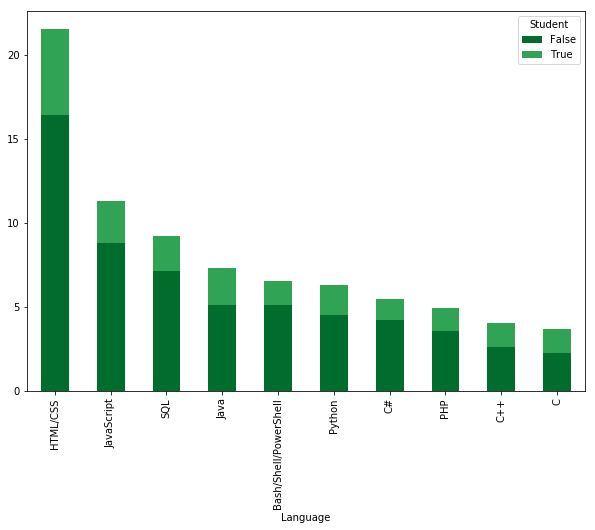

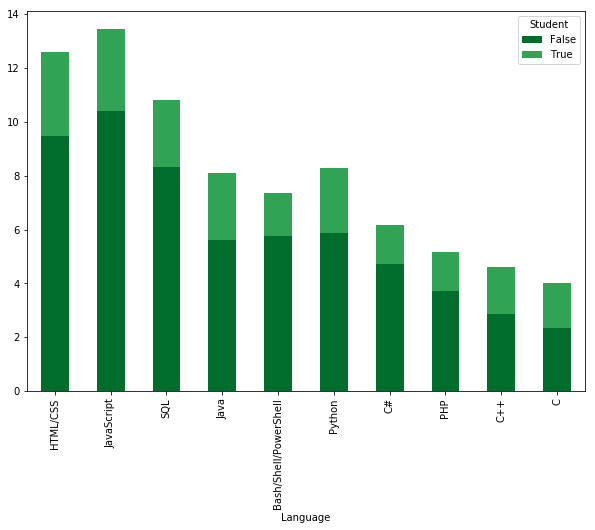

In [42]:
for year in ['2018', '2019']:
    df_year = df_master_worked_pcs_by_year_student[df_master_worked_pcs_by_year_student['SubDataFrame'] == year]
    df_year_pivot = df_year.pivot(index='Language', columns='Student', values='Respondent')
    df_year_pivot.loc[lang_order].plot.bar(stacked=True, color=colors, figsize=(10,7))

C has the highest proportion of student users in both 2018 and 2019. Generally there doesn't seem to be a massive shift in the internal student/non-student proportions per language from 2018 and 2019. What about the increasing popularity of python over Java and Bash/Shell/Powershell in 2019 compared to 2018, can that be explained by increasing student usage?
Well, from the above graph the student proportion in each language per year seems relatively static, so we can't conclude whether these internal demographics are driving python growth in popularity.

## 7. Conclusion

Our aim in this notebook was to use the yearly survey data to explore the factors that affect programming language popularity trends. More precisely, we aimed to:

- track the general popularity of languages from 2017 to 2019
- Investigate whether languages highly desired among developers for a given year are indicative of popular "worked" languages in following years
- Investigate whether language popularity with student and professional subgroups of developers was driving the trends we saw in the general population.

In our first visualisation, we saw that the top ten languages year on year were not entirely static, with some languages dropping out of the top ten and the rise of python over Java and shell scripting languages being indicative of this. We also discussed the changing categorisation of languages year on year in the survey results and the implications of this in our analysis.

Our second visualisation, we saw that language desirability in 2018 did tend to track actual popularity in 2019, and pythons desirability in 2018 did seem to hint at its actual jump in popularity over java and shell scripting in 2019. However, we also stressed that no concrete relationship could be inferred from our descriptive statistics alone.

Finally, we saw that that the student/non-student demographic dynamics per language in 2018 and 2019 did not provide much insight into why we saw certain langauges rise and fall in popularity from 2018 to 2019; these proportions were relatively static for each language between 2018 and 2019, including python, Java and Bash/Shell/Powershell.